In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('saida_sem_outliers.csv')

## Qual o nosso problema atual?

### Preencher valores nulos em:

- Tiros de meta: vamos usar RandomForestRegressor (e usar mediana para preencher temporariamente os vetores usados pelo RandomForestRegressor)
- Substituições: substituímos por zero (veremos que a correlação mais forte é entre Substituições do time 1 e 2)
- Contra-ataques: vamos usar RandomForestRegressor (e usar mediana para preencher temporariamente os vetores usados pelo RandomForestRegressor)

### Oque temos até agora?

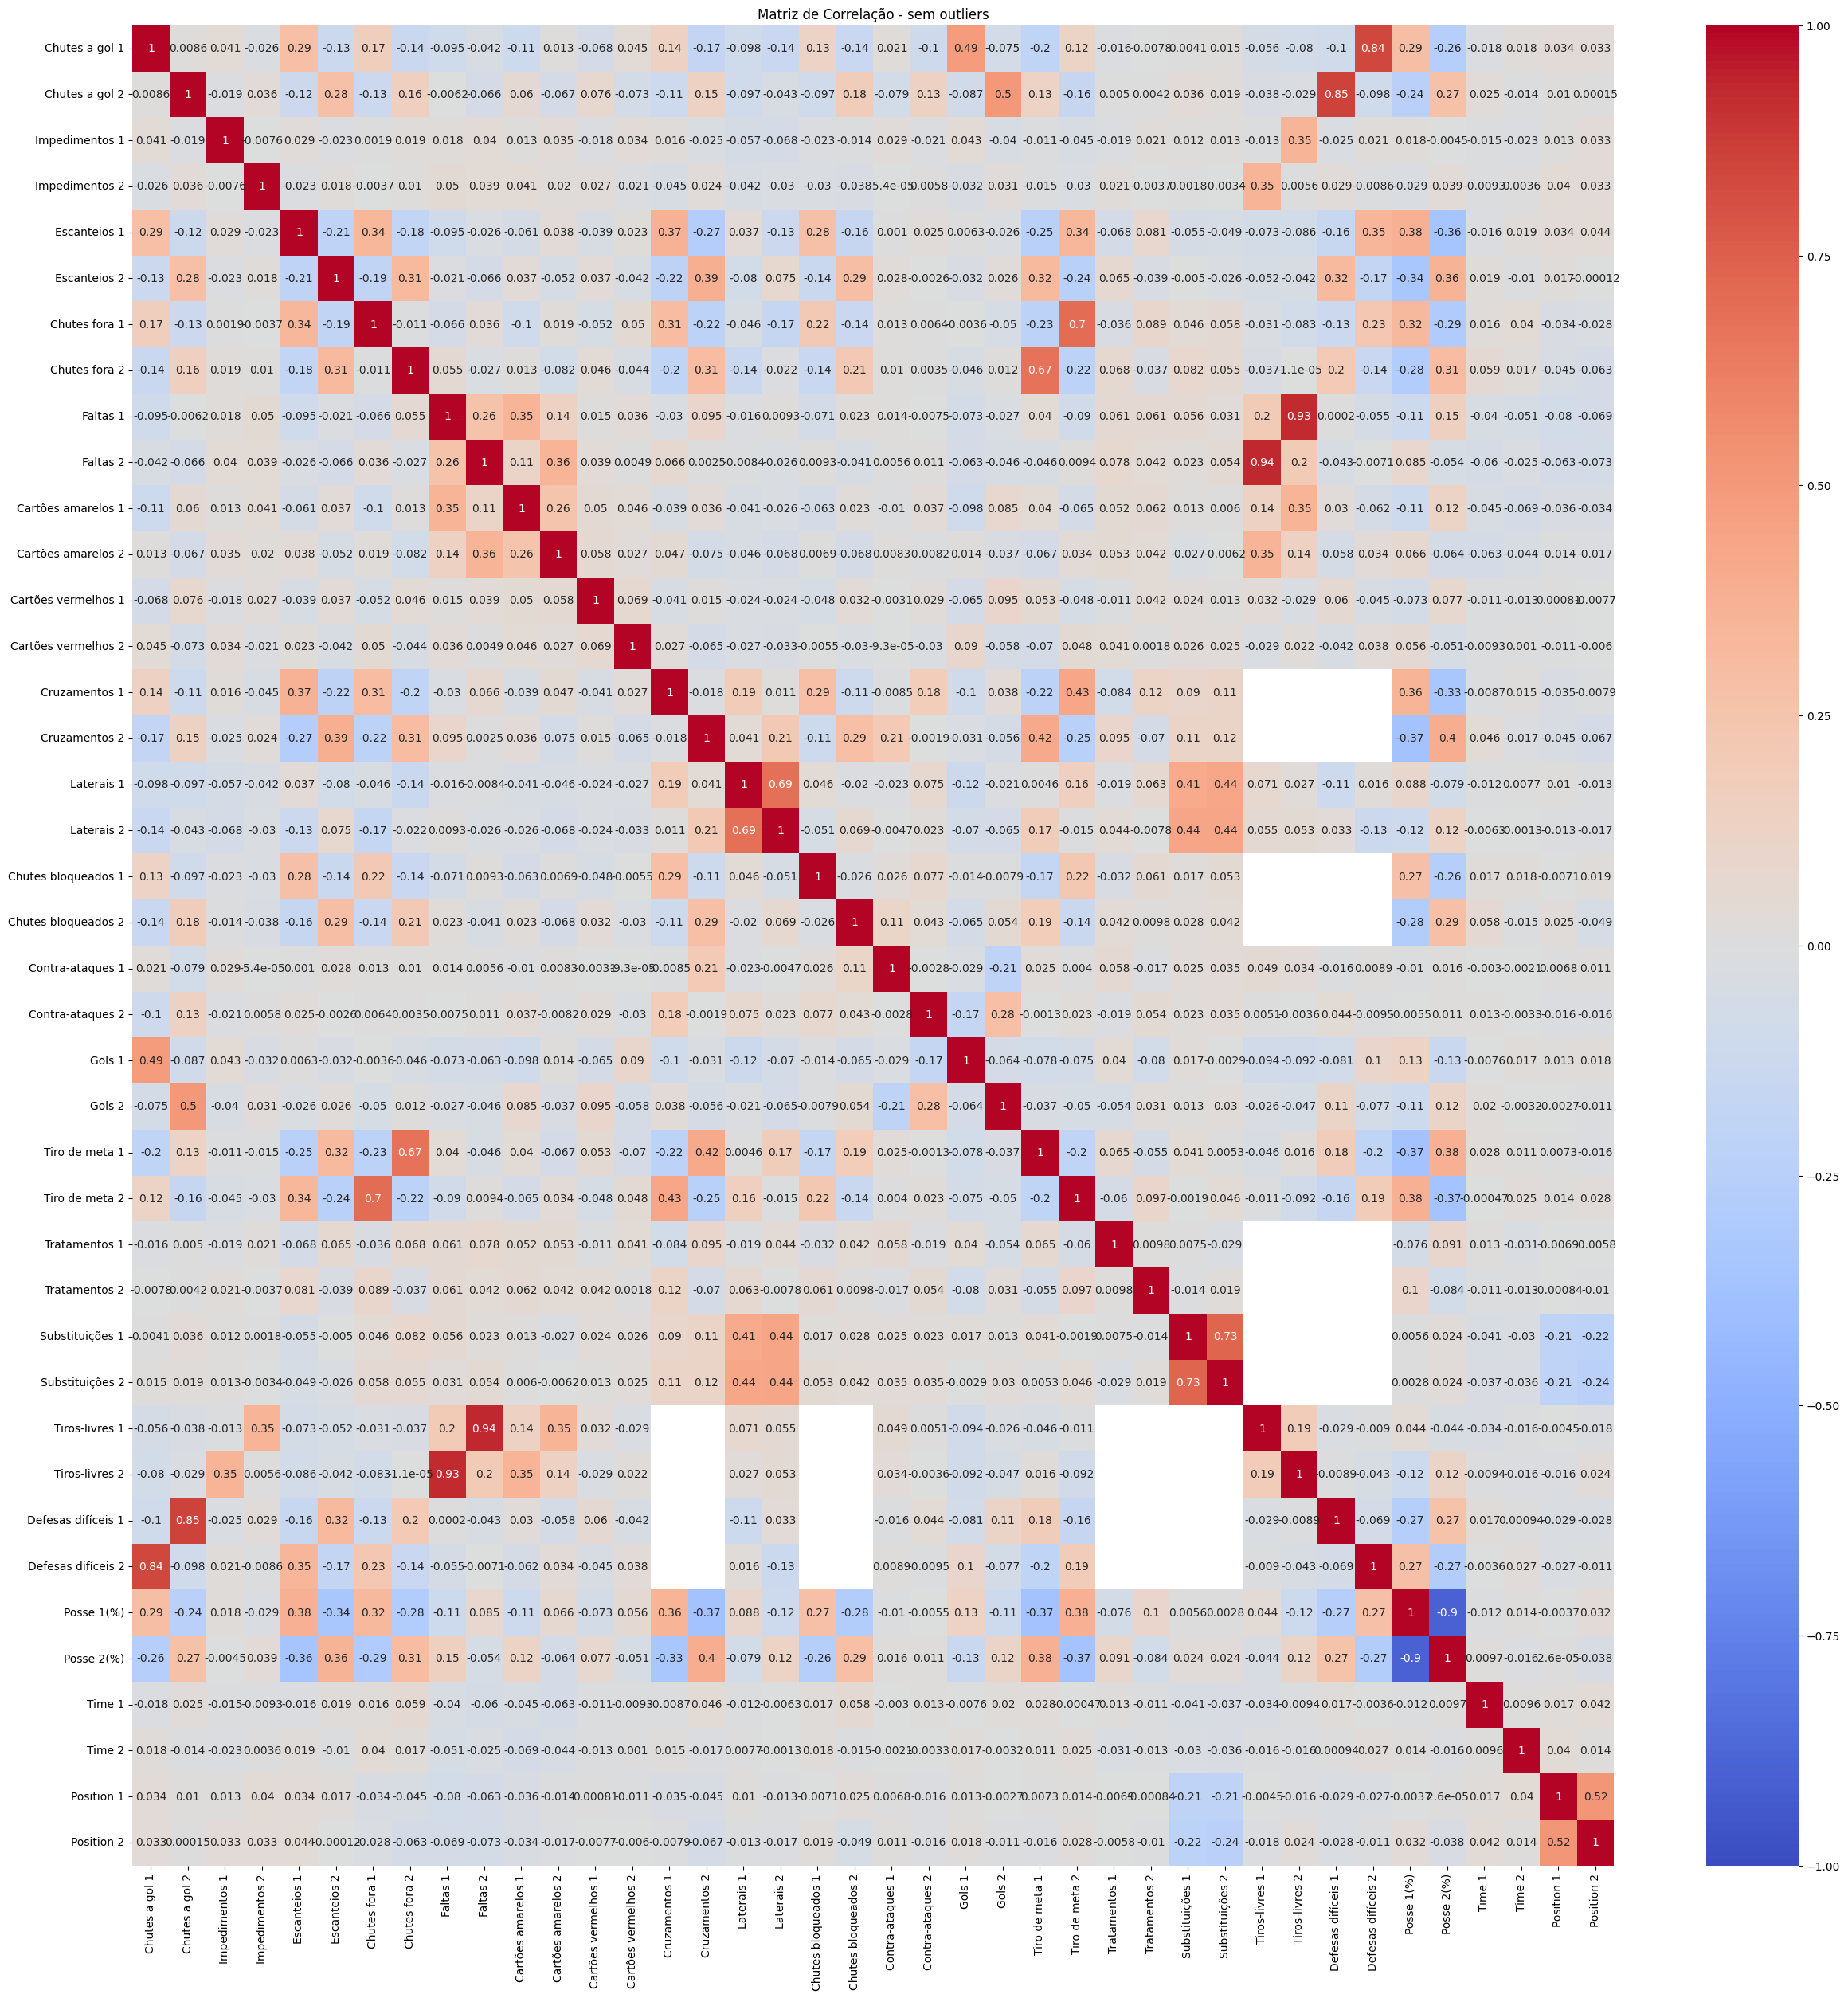

In [62]:
# Calcula as matrizes de correlação
correlacao = df.corr(numeric_only=True)

# Função para plotar heatmap
def plot_heatmap(correlacao, titulo):
    plt.figure(figsize=(30, 30))
    sns.heatmap(correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(titulo)
    plt.show()

# Plot 1: Heatmap da correlação de entrada.csv
plot_heatmap(correlacao, "Matriz de Correlação - sem outliers")


## Vamos ver as correlações de Tiros de Meta, Substituições e Contra-ataques

### Analisando Tiros de Meta

Tiros de Meta estão associados ao Chute fora do time oponente. Isso faz sentindo quando lembramos que Tiro de Meta é uma possível consequência de um Chute Fora.

In [50]:
# Selecionar apenas as colunas numéricas
df_numerico = df.select_dtypes(include=[float, int])

# Calcular a matriz de correlação com as colunas numéricas
correlacao = df_numerico.corr()

# Filtrar as correlações com a variável alvo 'Tiro de meta 1' e 'Tiro de meta 2'
correlacao_tiro_1 = correlacao["Tiro de meta 1"].sort_values(ascending=False)
correlacao_tiro_2 = correlacao["Tiro de meta 2"].sort_values(ascending=False)

# Definir um limite de intensidade para as correlações fortes (excluindo as neutras)
limite_inferior = 0.1

# Filtrar as correlações fortes (positivas e negativas)
correlacao_tiro_1_forte = correlacao_tiro_1[(correlacao_tiro_1.abs() >= limite_inferior) & (correlacao_tiro_1 != 1)]
correlacao_tiro_2_forte = correlacao_tiro_2[(correlacao_tiro_2.abs() >= limite_inferior) & (correlacao_tiro_2 != 1)]

# Exibir as colunas mais correlacionadas (considerando tanto positivas quanto negativas)
print("As colunas mais correlacionadas com 'Tiro de meta 1' (fortes):")
print(correlacao_tiro_1_forte.head(10))  # as mais fotes, incluindo tanto positivas quanto negativas

print("\nAs colunas mais correlacionadas com 'Tiro de meta 2' (fortes):")
print(correlacao_tiro_2_forte.head(10))  # as mais fortes, incluindo tanto positivas quanto negativas

As colunas mais correlacionadas com 'Tiro de meta 1' (fortes):
Chutes fora 2          0.674297
Cruzamentos 2          0.421102
Posse 2(%)             0.381424
Escanteios 2           0.317901
Chutes bloqueados 2    0.186090
Defesas difíceis 1     0.176673
Laterais 2             0.172435
Chutes a gol 2         0.128231
Chutes bloqueados 1   -0.170185
Chutes a gol 1        -0.195846
Name: Tiro de meta 1, dtype: float64

As colunas mais correlacionadas com 'Tiro de meta 2' (fortes):
Chutes fora 1          0.697923
Cruzamentos 1          0.431247
Posse 1(%)             0.379960
Escanteios 1           0.341807
Chutes bloqueados 1    0.220483
Defesas difíceis 2     0.193548
Laterais 1             0.158692
Chutes a gol 1         0.124616
Chutes bloqueados 2   -0.139519
Chutes a gol 2        -0.157785
Name: Tiro de meta 2, dtype: float64


### Analisando Substituições

In [51]:
# Selecionar apenas as colunas numéricas
df_numerico = df.select_dtypes(include=[float, int])

# Calcular a matriz de correlação com as colunas numéricas
correlacao = df_numerico.corr()

# Filtrar as correlações com a variável alvo 'Substituições 1' e 'Substituições 2'
correlacao_substituicoes_1 = correlacao["Substituições 1"].sort_values(ascending=False)
correlacao_substituicoes_2 = correlacao["Substituições 2"].sort_values(ascending=False)

# Definir um limite de intensidade para as correlações fortes (excluindo as neutras)
limite_inferior = 0.085

# Filtrar as correlações fortes (positivas e negativas)
correlacao_substituicoes_1_forte = correlacao_substituicoes_1[
    (correlacao_substituicoes_1.abs() >= limite_inferior) & (correlacao_substituicoes_1 != 1)
]
correlacao_substituicoes_2_forte = correlacao_substituicoes_2[
    (correlacao_substituicoes_2.abs() >= limite_inferior) & (correlacao_substituicoes_2 != 1)
]

# Exibir as colunas mais correlacionadas (considerando tanto positivas quanto negativas)
print("As colunas mais correlacionadas com 'Substituições 1' (fortes):")
print(correlacao_substituicoes_1_forte.head(10))  # as mais fortes, incluindo tanto positivas quanto negativas

print("\nAs colunas mais correlacionadas com 'Substituições 2' (fortes):")
print(correlacao_substituicoes_2_forte.head(10))  # as mais fortes, incluindo tanto positivas quanto negativas

As colunas mais correlacionadas com 'Substituições 1' (fortes):
Substituições 2    0.732160
Laterais 2         0.438537
Laterais 1         0.411649
Cruzamentos 2      0.111677
Cruzamentos 1      0.090190
Name: Substituições 1, dtype: float64

As colunas mais correlacionadas com 'Substituições 2' (fortes):
Substituições 1    0.732160
Laterais 2         0.443625
Laterais 1         0.435148
Cruzamentos 2      0.115646
Cruzamentos 1      0.114099
Name: Substituições 2, dtype: float64


### Analisando Contra-ataques

In [52]:
# Selecionar apenas as colunas numéricas
df_numerico = df.select_dtypes(include=[float, int])

# Calcular a matriz de correlação com as colunas numéricas
correlacao = df_numerico.corr()

# Filtrar as correlações com a variável alvo 'Contra-ataques 1' e 'Contra-ataques 2'
correlacao_contra_1 = correlacao["Contra-ataques 1"].sort_values(ascending=False)
correlacao_contra_2 = correlacao["Contra-ataques 2"].sort_values(ascending=False)

# Filtrar as correlações fortes (positivas e negativas)
correlacao_contra_1_forte = correlacao_contra_1[
    (correlacao_contra_1.abs() >= limite_inferior) & (correlacao_contra_1 != 1)
]
correlacao_contra_2_forte = correlacao_contra_2[
    (correlacao_contra_2.abs() >= limite_inferior) & (correlacao_contra_2 != 1)
]

# Exibir as colunas mais correlacionadas (considerando tanto positivas quanto negativas)
print("As colunas mais correlacionadas com 'Contra-ataques 1' (fortes):")
print(correlacao_contra_1_forte.head(10))  # as mais fortes, incluindo tanto positivas quanto negativas

print("\nAs colunas mais correlacionadas com 'Contra-ataques 2' (fortes):")
print(correlacao_contra_2_forte.head(10))  # as mais fortes, incluindo tanto positivas quanto negativas

As colunas mais correlacionadas com 'Contra-ataques 1' (fortes):
Cruzamentos 2          0.179612
Gols 1                 0.158691
Contra-ataques 2       0.115473
Chutes bloqueados 2    0.093270
Chutes a gol 1         0.091040
Gols 2                -0.145829
Name: Contra-ataques 1, dtype: float64

As colunas mais correlacionadas com 'Contra-ataques 2' (fortes):
Gols 2                 0.202288
Cruzamentos 1          0.169599
Chutes a gol 2         0.135139
Contra-ataques 1       0.115473
Chutes bloqueados 1    0.093217
Chutes a gol 1        -0.095871
Gols 1                -0.180923
Name: Contra-ataques 2, dtype: float64


## Preenchendo Tiros de meta, Substituições Contra-ataques

### Preenchendo Tiros de Meta

In [53]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# === 0. Leitura do DataFrame ===
df = pd.read_csv('saida_sem_outliers.csv')

# === 1. Codifica variáveis categóricas ===
colunas_categoricas = df.select_dtypes(include='object').columns

label_encoders = {}
for col in colunas_categoricas:
    le = LabelEncoder()
    df[col] = df[col].fillna('')  # Trata valores nulos nas strings
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Função para realizar o processo de preenchimento para qualquer coluna nula
def preencher_valores_nulos(coluna_nula):
    # === 3. Correlações com a coluna nula ===
    correlacoes = df.corr()[coluna_nula].abs().sort_values(ascending=False)

    # Seleciona as 5 colunas mais correlacionadas
    colunas_correlacionadas = correlacoes.drop(coluna_nula).head(5).index.tolist()

    # === 4. Divide entre linhas com e sem nulos ===
    df_sem_nulo = df[df[coluna_nula].notnull()]
    df_com_nulo = df[df[coluna_nula].isnull()]

    # === 5. Treina o modelo RandomForest ===
    X_treino = df_sem_nulo[colunas_correlacionadas]
    y_treino = df_sem_nulo[coluna_nula]

    modelo = RandomForestRegressor(n_estimators=100, random_state=42)
    modelo.fit(X_treino, y_treino)

    # === 6. Previsão preenchendo temporariamente valores faltantes com a mediana ===
    X_previsao = df_com_nulo[colunas_correlacionadas].copy()

    # Preenche temporariamente os NaNs com a mediana de cada coluna
    for col in colunas_correlacionadas:
        mediana = df_sem_nulo[col].median()
        X_previsao[col] = X_previsao[col].fillna(mediana)

    # === 7. Previsão e substituição dos valores nulos ===
    valores_previstos = modelo.predict(X_previsao)
    indices_para_substituir = X_previsao.index

    # Mostra quantos nulos existiam antes da substituição
    total_nulos_antes = df[coluna_nula].isnull().sum()

    # Substitui apenas a coluna nula no DataFrame original
    df.loc[indices_para_substituir, coluna_nula] = valores_previstos

    return correlacoes, colunas_correlacionadas, total_nulos_antes, len(X_previsao)

# Processa para "Tiro de meta 1"
correlacoes_1, colunas_correlacionadas_1, total_nulos_antes_1, len_1 = preencher_valores_nulos('Tiro de meta 1')

# Processa para "Tiro de meta 2"
correlacoes_2, colunas_correlacionadas_2, total_nulos_antes_2, len_2 = preencher_valores_nulos('Tiro de meta 2')

# === 8. Exporta o resultado para CSV ===
df.to_csv("saida_com_valores_substituidos.csv", index=False)

# Exibe as informações
print("Colunas correlacionadas para 'Tiro de meta 1':", colunas_correlacionadas_1)
print("Total de nulos antes para 'Tiro de meta 1':", total_nulos_antes_1)
print("Total de valores que puderam ser previstos para 'Tiro de meta 1':", len_1)

print("Colunas correlacionadas para 'Tiro de meta 2':", colunas_correlacionadas_2)
print("Total de nulos antes para 'Tiro de meta 2':", total_nulos_antes_2)
print("Total de valores que puderam ser previstos para 'Tiro de meta 2':", len_2)


Colunas correlacionadas para 'Tiro de meta 1': ['Chutes fora 2', 'Cruzamentos 2', 'Posse 2(%)', 'Posse 1(%)', 'Escanteios 2']
Total de nulos antes para 'Tiro de meta 1': 15232
Total de valores que puderam ser previstos para 'Tiro de meta 1': 15232
Colunas correlacionadas para 'Tiro de meta 2': ['Chutes fora 1', 'Cruzamentos 1', 'Posse 1(%)', 'Posse 2(%)', 'Escanteios 1']
Total de nulos antes para 'Tiro de meta 2': 15232
Total de valores que puderam ser previstos para 'Tiro de meta 2': 15232


### Preenchendo Substituições


In [54]:
# Carregar o DataFrame
df = pd.read_csv("saida_sem_outliers.csv")

# Contar valores nulos antes da substituição
nulos_sub1 = df['Substituições 1'].isna().sum()
nulos_sub2 = df['Substituições 2'].isna().sum()
total_nulos = nulos_sub1 + nulos_sub2

print(f"Valores nulos em 'Substituições 1' antes da substituição: {nulos_sub1}")
print(f"Valores nulos em 'Substituições 2' antes da substituição: {nulos_sub2}")
print(f"Total de valores substituídos: {total_nulos}")

# Substituir valores nulos por 0
df['Substituições 1'] = df['Substituições 1'].fillna(0)
df['Substituições 2'] = df['Substituições 2'].fillna(0)

# Salvar o DataFrame com as alterações
df.to_csv("saida_com_valores_substituidos.csv", index=False)


Valores nulos em 'Substituições 1' antes da substituição: 17786
Valores nulos em 'Substituições 2' antes da substituição: 17786
Total de valores substituídos: 35572


### Preenchendo Contra-ataques

In [55]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# === 0. Leitura do DataFrame ===
df = pd.read_csv('saida_sem_outliers.csv')

# === 1. Codifica variáveis categóricas ===
colunas_categoricas = df.select_dtypes(include='object').columns

label_encoders = {}
for col in colunas_categoricas:
    le = LabelEncoder()
    df[col] = df[col].fillna('')  # Trata valores nulos nas strings
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Função para realizar o processo de preenchimento para qualquer coluna nula
def preencher_valores_nulos(coluna_nula):
    # === 3. Correlações com a coluna nula ===
    correlacoes = df.corr()[coluna_nula].abs().sort_values(ascending=False)

    # Seleciona as 5 colunas mais correlacionadas
    colunas_correlacionadas = correlacoes.drop(coluna_nula).head(5).index.tolist()

    # === 4. Divide entre linhas com e sem nulos ===
    df_sem_nulo = df[df[coluna_nula].notnull()]
    df_com_nulo = df[df[coluna_nula].isnull()]

    # === 5. Treina o modelo RandomForest ===
    X_treino = df_sem_nulo[colunas_correlacionadas]
    y_treino = df_sem_nulo[coluna_nula]

    modelo = RandomForestRegressor(n_estimators=100, random_state=42)
    modelo.fit(X_treino, y_treino)

    # === 6. Previsão preenchendo temporariamente valores faltantes com a mediana ===
    X_previsao = df_com_nulo[colunas_correlacionadas].copy()

    # Preenche temporariamente os NaNs com a mediana de cada coluna
    for col in colunas_correlacionadas:
        mediana = df_sem_nulo[col].median()
        X_previsao[col] = X_previsao[col].fillna(mediana)

    # === 7. Previsão e substituição dos valores nulos ===
    valores_previstos = modelo.predict(X_previsao)
    indices_para_substituir = X_previsao.index

    # Mostra quantos nulos existiam antes da substituição
    total_nulos_antes = df[coluna_nula].isnull().sum()

    # Substitui apenas a coluna nula no DataFrame original
    df.loc[indices_para_substituir, coluna_nula] = valores_previstos

    return correlacoes, colunas_correlacionadas, total_nulos_antes, len(X_previsao)

# Processa para "Contra-ataques 1"
correlacoes_1, colunas_correlacionadas_1, total_nulos_antes_1, len_1 = preencher_valores_nulos('Contra-ataques 1')

# Processa para "Contra-ataques 2"
correlacoes_2, colunas_correlacionadas_2, total_nulos_antes_2, len_2 = preencher_valores_nulos('Contra-ataques 2')

# === 8. Exporta o resultado para CSV ===
df.to_csv("saida_com_valores_substituidos.csv", index=False)

# Exibe as informações
print("Colunas correlacionadas para 'Contra-ataques 1':", colunas_correlacionadas_1)
print("Total de nulos antes para 'Contra-ataques 1':", total_nulos_antes_1)
print("Total de valores que puderam ser previstos para 'Contra-ataques 1':", len_1)

print("Colunas correlacionadas para 'Contra-ataques 2':", colunas_correlacionadas_2)
print("Total de nulos antes para 'Contra-ataques 2':", total_nulos_antes_2)
print("Total de valores que puderam ser previstos para 'Contra-ataques 2':", len_2)


Colunas correlacionadas para 'Contra-ataques 1': ['Cruzamentos 2', 'Gols 1', 'Gols 2', 'Contra-ataques 2', 'Chutes bloqueados 2']
Total de nulos antes para 'Contra-ataques 1': 20890
Total de valores que puderam ser previstos para 'Contra-ataques 1': 20890
Colunas correlacionadas para 'Contra-ataques 2': ['Gols 2', 'Gols 1', 'Cruzamentos 1', 'Chutes a gol 2', 'Contra-ataques 1']
Total de nulos antes para 'Contra-ataques 2': 20890
Total de valores que puderam ser previstos para 'Contra-ataques 2': 20890


## Vamos analisar as mudanças do Tiro de meta e Contra-ataques com outros elementos

### Tiros de meta

C:\Users\danie\AppData\Local\Temp\ipykernel_12308\3564922343.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacoes_original_ordenadas.values,


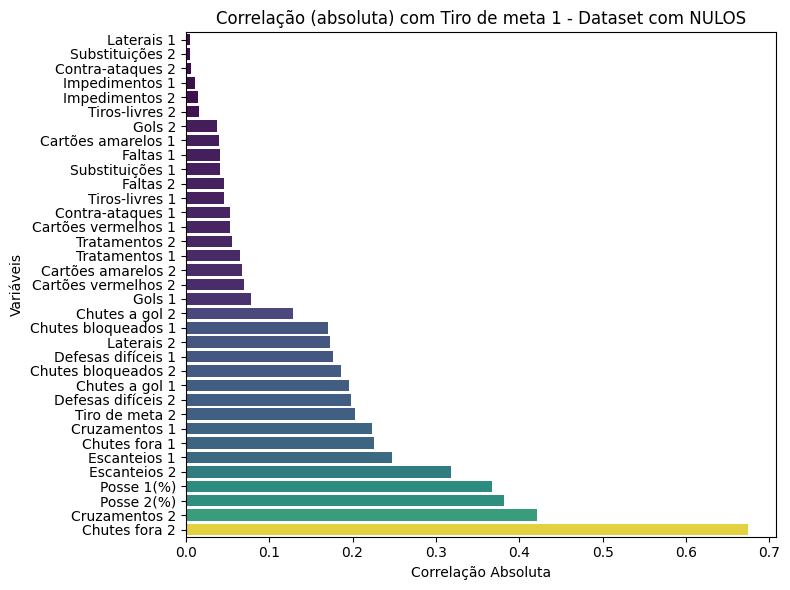

C:\Users\danie\AppData\Local\Temp\ipykernel_12308\3564922343.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacoes_limpo_ordenadas.values,


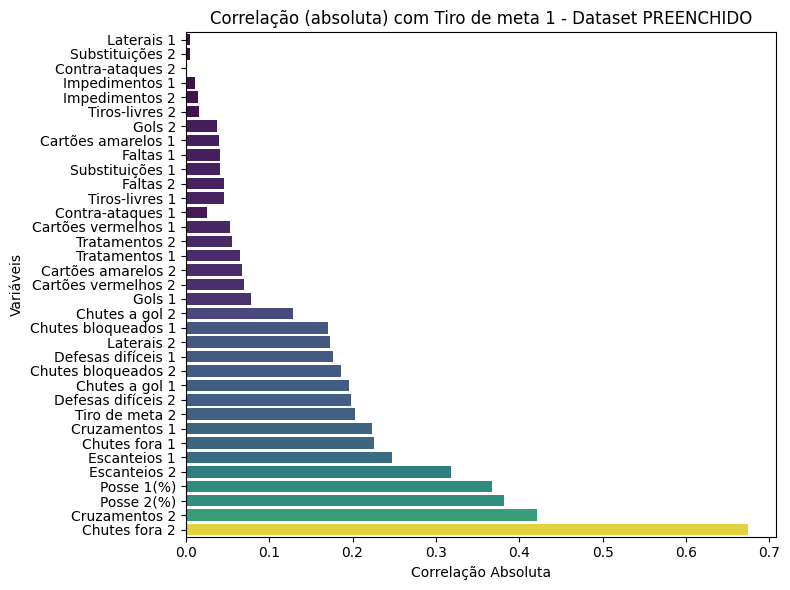

C:\Users\danie\AppData\Local\Temp\ipykernel_12308\3564922343.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diferencas_ordenadas.values,


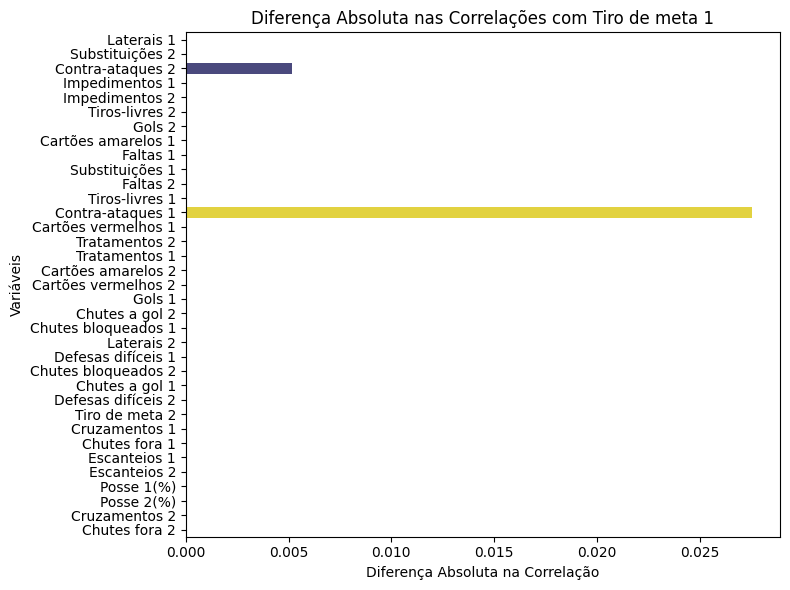

C:\Users\danie\AppData\Local\Temp\ipykernel_12308\3564922343.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacoes_original_ordenadas.values,


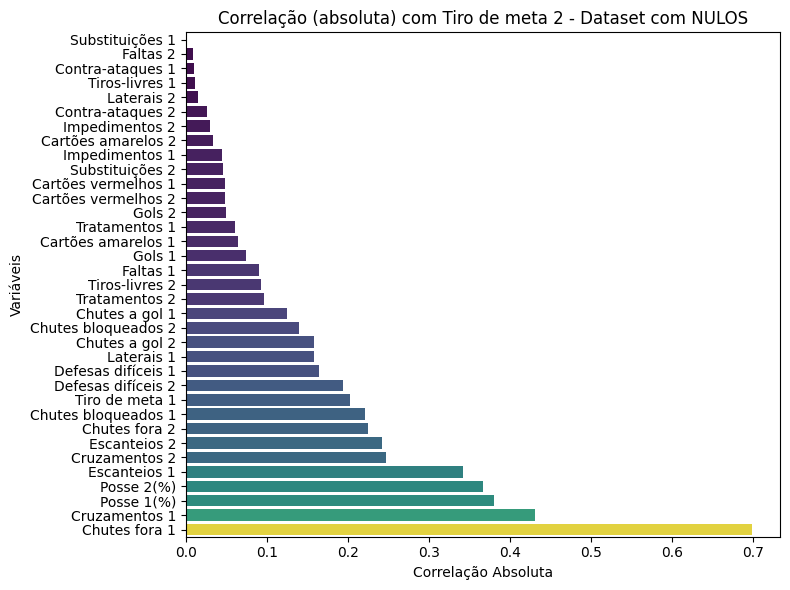

C:\Users\danie\AppData\Local\Temp\ipykernel_12308\3564922343.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacoes_limpo_ordenadas.values,


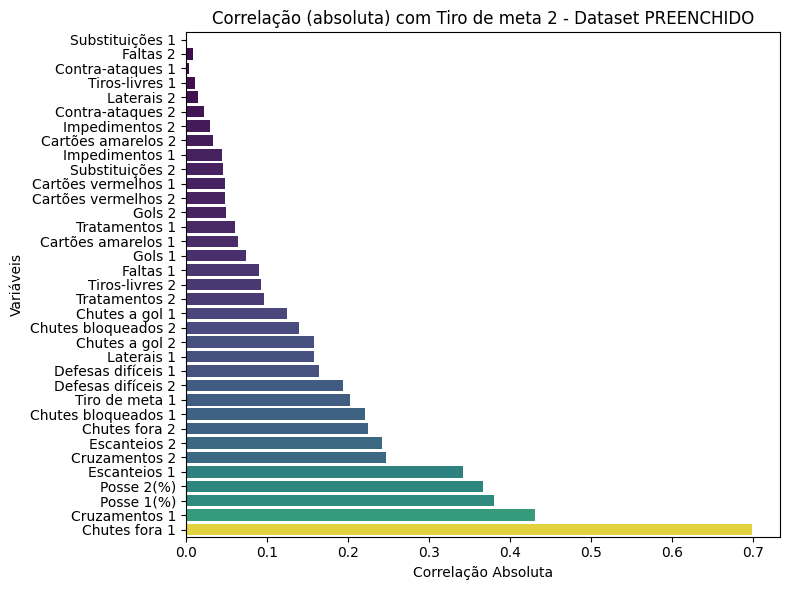

C:\Users\danie\AppData\Local\Temp\ipykernel_12308\3564922343.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diferencas_ordenadas.values,


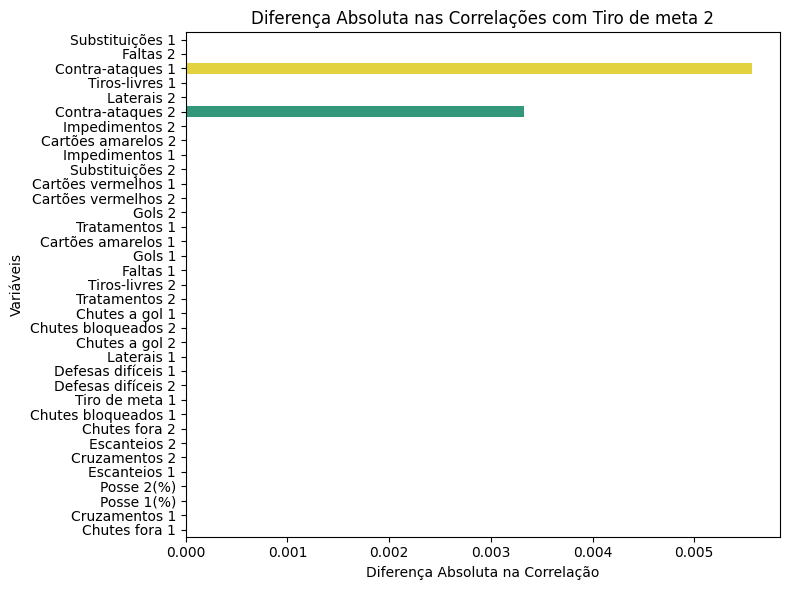

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lê os dados
df_original = pd.read_csv('saida_sem_outliers.csv')
df_limpo = pd.read_csv('saida_com_valores_substituidos.csv')

# Remove colunas sem variância
df_valido_original = df_original.loc[:, df_original.nunique() > 1]
df_valido_limpo = df_limpo.loc[:, df_limpo.nunique() > 1]

# Filtra apenas colunas numéricas
df_numerico_original = df_valido_original.select_dtypes(include='number')
df_numerico_limpo = df_valido_limpo.select_dtypes(include='number')

# Função auxiliar para gerar cores com gradiente horizontal
def gerar_cores(valores, cmap_name='coolwarm'):
    norm = plt.Normalize(valores.min(), valores.max())
    cmap = plt.get_cmap(cmap_name)
    return [cmap(norm(v)) for v in valores]

# Função para gerar os gráficos
def gerar_graficos(variavel_alvo):
    # Calcula correlação
    correlacao_original = df_numerico_original.corr(numeric_only=True)
    correlacao_limpo = df_numerico_limpo.corr(numeric_only=True)

    # Filtra correlações com a variável alvo (exceto ela mesma)
    correlacoes_original = correlacao_original[variavel_alvo].drop(labels=[variavel_alvo], errors='ignore').abs()
    correlacoes_limpo = correlacao_limpo[variavel_alvo].drop(labels=[variavel_alvo], errors='ignore').abs()

    # Interseção de variáveis comuns
    variaveis_comuns = correlacoes_original.index.intersection(correlacoes_limpo.index)
    correlacoes_original = correlacoes_original.loc[variaveis_comuns]
    correlacoes_limpo = correlacoes_limpo.loc[variaveis_comuns]

    # Ordena conforme o dataset original (ordem base)
    ordem_variaveis = correlacoes_original.sort_values().index

    # Reordena os dados conforme o gráfico 1
    correlacoes_original_ordenadas = correlacoes_original.loc[ordem_variaveis]
    correlacoes_limpo_ordenadas = correlacoes_limpo.loc[ordem_variaveis]
    diferencas_ordenadas = (correlacoes_limpo_ordenadas - correlacoes_original_ordenadas).abs()

    # --- Plot 1: Dataset original ---
    plt.figure(figsize=(8, 6))
    cores1 = gerar_cores(correlacoes_original_ordenadas.values, cmap_name='viridis')
    sns.barplot(x=correlacoes_original_ordenadas.values,
                y=correlacoes_original_ordenadas.index,
                palette=cores1)
    plt.title(f'Correlação (absoluta) com {variavel_alvo} - Dataset com NULOS')
    plt.xlabel('Correlação Absoluta')
    plt.ylabel('Variáveis')
    plt.tight_layout()
    plt.show()

    # --- Plot 2: Dataset limpo ---
    plt.figure(figsize=(8, 6))
    cores2 = gerar_cores(correlacoes_limpo_ordenadas.values, cmap_name='viridis')
    sns.barplot(x=correlacoes_limpo_ordenadas.values,
                y=correlacoes_limpo_ordenadas.index,
                palette=cores2)
    plt.title(f'Correlação (absoluta) com {variavel_alvo} - Dataset PREENCHIDO')
    plt.xlabel('Correlação Absoluta')
    plt.ylabel('Variáveis')
    plt.tight_layout()
    plt.show()

    # --- Plot 3: Diferença absoluta ---
    plt.figure(figsize=(8, 6))
    cores3 = gerar_cores(diferencas_ordenadas.values, cmap_name='viridis')
    sns.barplot(x=diferencas_ordenadas.values,
                y=diferencas_ordenadas.index,
                palette=cores3)
    plt.title(f'Diferença Absoluta nas Correlações com {variavel_alvo}')
    plt.xlabel('Diferença Absoluta na Correlação')
    plt.ylabel('Variáveis')
    plt.tight_layout()
    plt.show()

# Gerar gráficos para 'Tiro de meta 1' e 'Tiro de meta 2'
gerar_graficos('Tiro de meta 1')
gerar_graficos('Tiro de meta 2')


### Contra-ataques

C:\Users\danie\AppData\Local\Temp\ipykernel_12308\1272911824.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacoes_original_ordenadas.values,


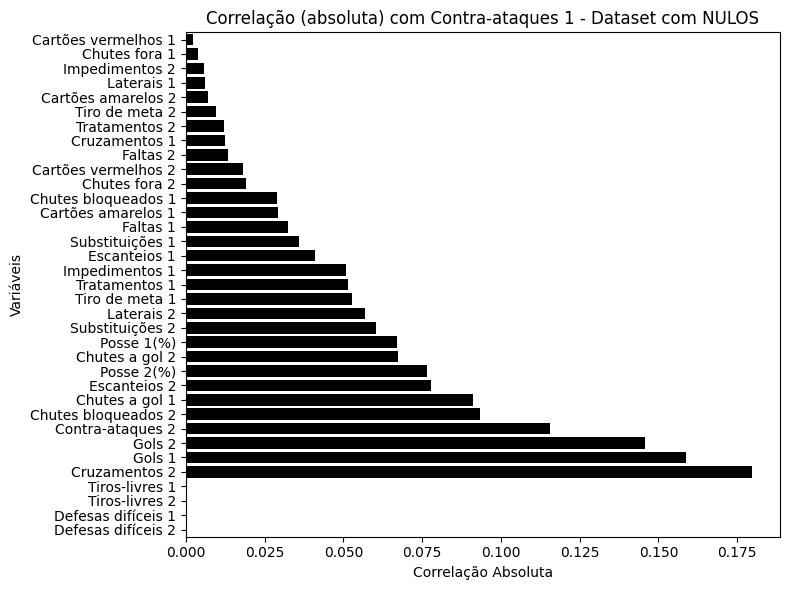

C:\Users\danie\AppData\Local\Temp\ipykernel_12308\1272911824.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacoes_limpo_ordenadas.values,


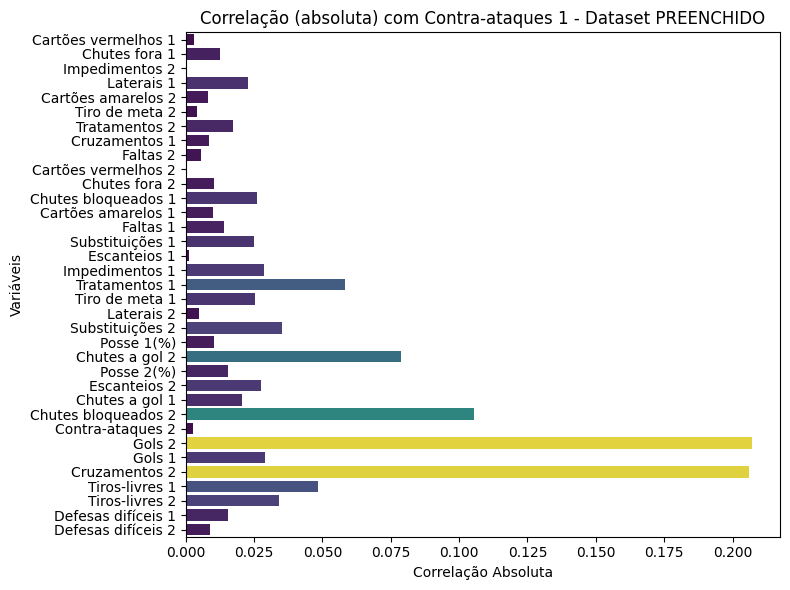

C:\Users\danie\AppData\Local\Temp\ipykernel_12308\1272911824.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diferencas_ordenadas.values,


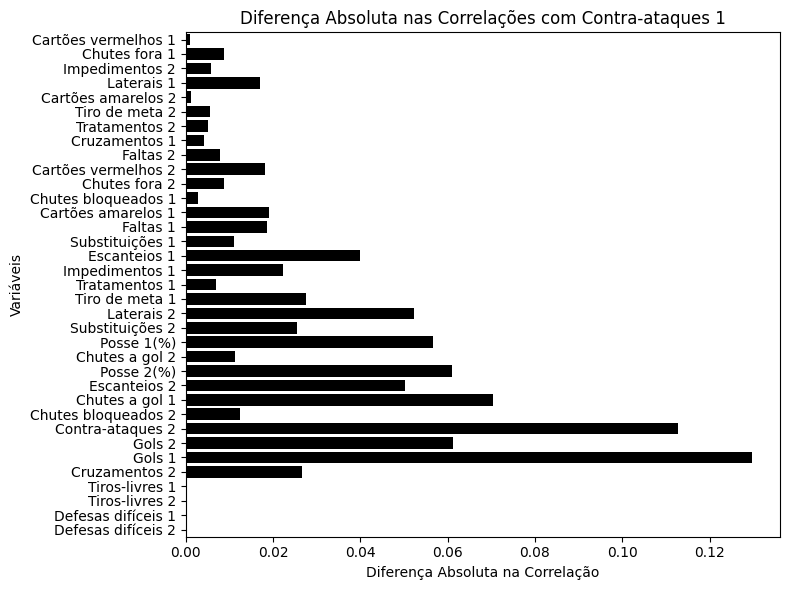

C:\Users\danie\AppData\Local\Temp\ipykernel_12308\1272911824.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacoes_original_ordenadas.values,


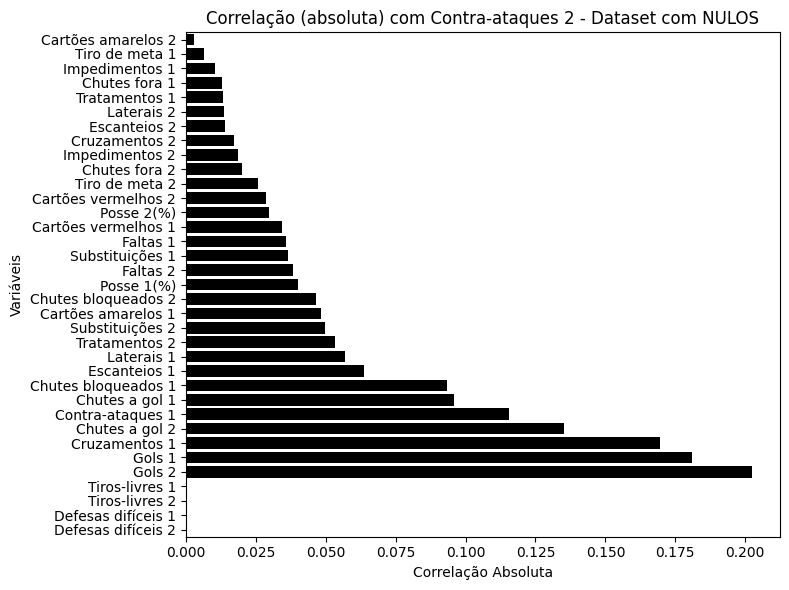

C:\Users\danie\AppData\Local\Temp\ipykernel_12308\1272911824.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacoes_limpo_ordenadas.values,


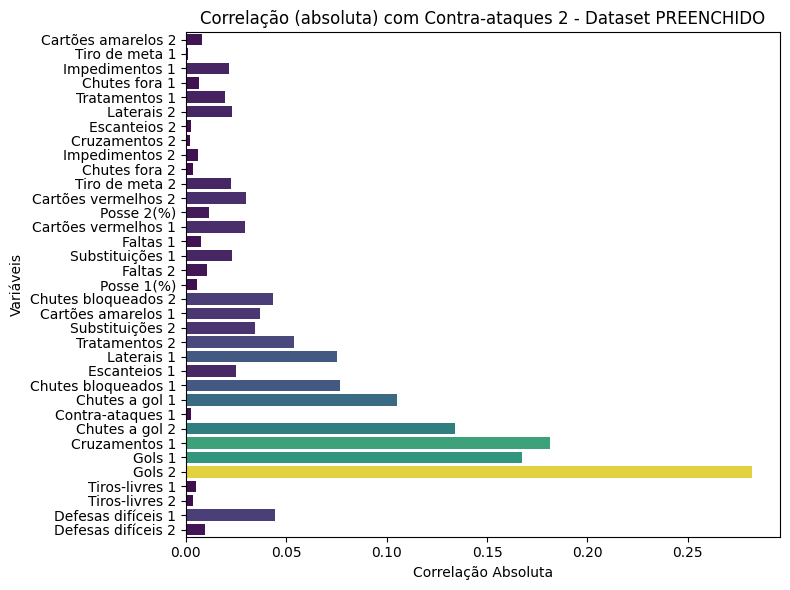

C:\Users\danie\AppData\Local\Temp\ipykernel_12308\1272911824.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diferencas_ordenadas.values,


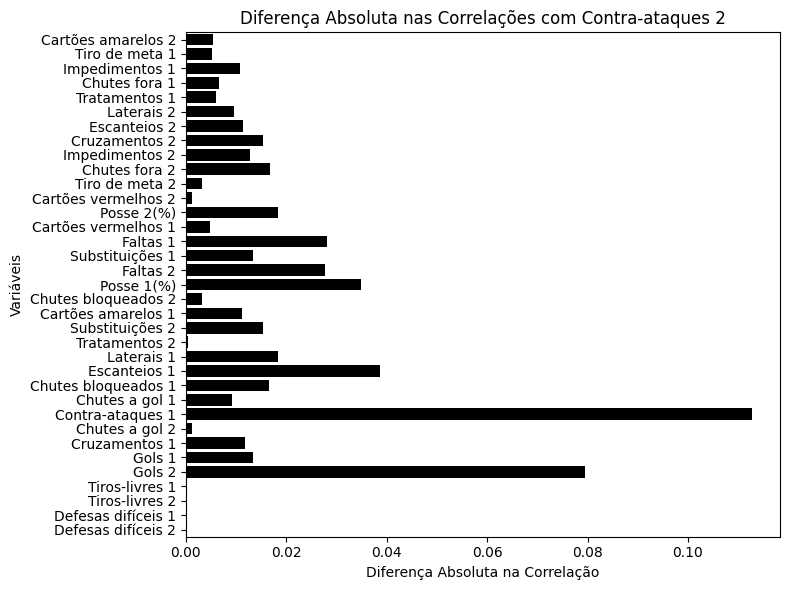

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lê os dados
df_original = pd.read_csv('saida_sem_outliers.csv')
df_limpo = pd.read_csv('saida_com_valores_substituidos.csv')

# Remove colunas sem variância
df_valido_original = df_original.loc[:, df_original.nunique() > 1]
df_valido_limpo = df_limpo.loc[:, df_limpo.nunique() > 1]

# Filtra apenas colunas numéricas
df_numerico_original = df_valido_original.select_dtypes(include='number')
df_numerico_limpo = df_valido_limpo.select_dtypes(include='number')

# Função auxiliar para gerar cores com gradiente horizontal
def gerar_cores(valores, cmap_name='coolwarm'):
    norm = plt.Normalize(valores.min(), valores.max())
    cmap = plt.get_cmap(cmap_name)
    return [cmap(norm(v)) for v in valores]

# Função para gerar os gráficos
def gerar_graficos(variavel_alvo):
    # Calcula correlação
    correlacao_original = df_numerico_original.corr(numeric_only=True)
    correlacao_limpo = df_numerico_limpo.corr(numeric_only=True)

    # Filtra correlações com a variável alvo (exceto ela mesma)
    correlacoes_original = correlacao_original[variavel_alvo].drop(labels=[variavel_alvo], errors='ignore').abs()
    correlacoes_limpo = correlacao_limpo[variavel_alvo].drop(labels=[variavel_alvo], errors='ignore').abs()

    # Interseção de variáveis comuns
    variaveis_comuns = correlacoes_original.index.intersection(correlacoes_limpo.index)
    correlacoes_original = correlacoes_original.loc[variaveis_comuns]
    correlacoes_limpo = correlacoes_limpo.loc[variaveis_comuns]

    # Ordena conforme o dataset original (ordem base)
    ordem_variaveis = correlacoes_original.sort_values().index

    # Reordena os dados conforme o gráfico 1
    correlacoes_original_ordenadas = correlacoes_original.loc[ordem_variaveis]
    correlacoes_limpo_ordenadas = correlacoes_limpo.loc[ordem_variaveis]
    diferencas_ordenadas = (correlacoes_limpo_ordenadas - correlacoes_original_ordenadas).abs()

    # --- Plot 1: Dataset original ---
    plt.figure(figsize=(8, 6))
    cores1 = gerar_cores(correlacoes_original_ordenadas.values, cmap_name='viridis')
    sns.barplot(x=correlacoes_original_ordenadas.values,
                y=correlacoes_original_ordenadas.index,
                palette=cores1)
    plt.title(f'Correlação (absoluta) com {variavel_alvo} - Dataset com NULOS')
    plt.xlabel('Correlação Absoluta')
    plt.ylabel('Variáveis')
    plt.tight_layout()
    plt.show()

    # --- Plot 2: Dataset limpo ---
    plt.figure(figsize=(8, 6))
    cores2 = gerar_cores(correlacoes_limpo_ordenadas.values, cmap_name='viridis')
    sns.barplot(x=correlacoes_limpo_ordenadas.values,
                y=correlacoes_limpo_ordenadas.index,
                palette=cores2)
    plt.title(f'Correlação (absoluta) com {variavel_alvo} - Dataset PREENCHIDO')
    plt.xlabel('Correlação Absoluta')
    plt.ylabel('Variáveis')
    plt.tight_layout()
    plt.show()

    # --- Plot 3: Diferença absoluta ---
    plt.figure(figsize=(8, 6))
    cores3 = gerar_cores(diferencas_ordenadas.values, cmap_name='viridis')
    sns.barplot(x=diferencas_ordenadas.values,
                y=diferencas_ordenadas.index,
                palette=cores3)
    plt.title(f'Diferença Absoluta nas Correlações com {variavel_alvo}')
    plt.xlabel('Diferença Absoluta na Correlação')
    plt.ylabel('Variáveis')
    plt.tight_layout()
    plt.show()

# Gerar gráficos para 'Contra-ataques 1' e 'Contra-ataques 2'
gerar_graficos('Contra-ataques 1')
gerar_graficos('Contra-ataques 2')


## Vamos ver oque mudou no global

C:\Users\danie\AppData\Local\Temp\ipykernel_12308\1045933643.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacoes_gols1.values, y=correlacoes_gols1.index, palette='coolwarm')


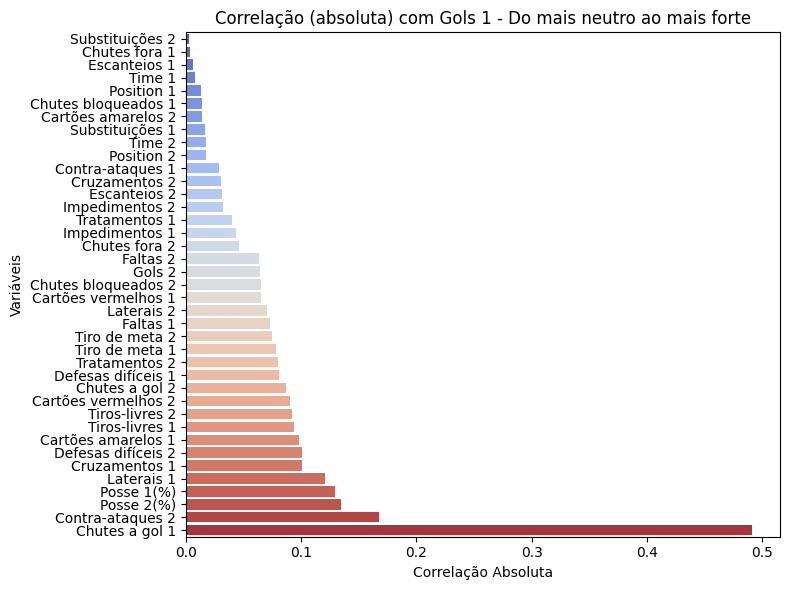

C:\Users\danie\AppData\Local\Temp\ipykernel_12308\1045933643.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacoes_gols2.values, y=correlacoes_gols2.index, palette='coolwarm')


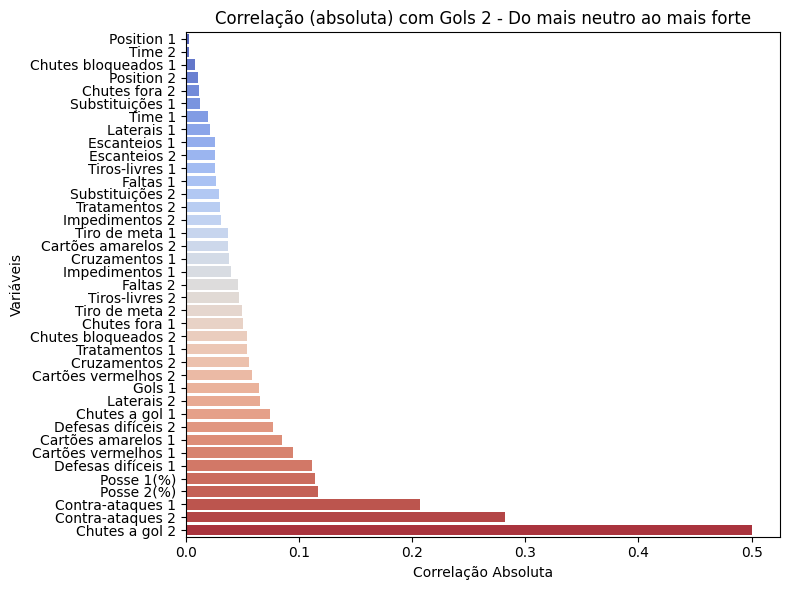

In [58]:
df = pd.read_csv('saida_com_valores_substituidos.csv')

# Remove colunas sem variância (como cartões vermelhos com todos 0)
df_valido = df.loc[:, df.nunique() > 1]

# Filtra apenas colunas numéricas
df_numerico = df_valido.select_dtypes(include='number')

# Calcula correlação
correlacao = df_numerico.corr(numeric_only=True)

# Filtra correlações com Gols 1 (exceto ele mesmo)
correlacoes_gols1 = correlacao['Gols 1'].drop(labels=['Gols 1', ], errors='ignore').abs().sort_values()

# Filtra correlações com Gols 2 (exceto ele mesmo)
correlacoes_gols2 = correlacao['Gols 2'].drop(labels=['Gols 2'], errors='ignore').abs().sort_values()

# Plot para Gols 1
plt.figure(figsize=(8, 6))
sns.barplot(x=correlacoes_gols1.values, y=correlacoes_gols1.index, palette='coolwarm')
plt.title('Correlação (absoluta) com Gols 1 - Do mais neutro ao mais forte')
plt.xlabel('Correlação Absoluta')
plt.ylabel('Variáveis')
plt.tight_layout()
plt.show()

# Plot para Gols 2
plt.figure(figsize=(8, 6))
sns.barplot(x=correlacoes_gols2.values, y=correlacoes_gols2.index, palette='coolwarm')
plt.title('Correlação (absoluta) com Gols 2 - Do mais neutro ao mais forte')
plt.xlabel('Correlação Absoluta')
plt.ylabel('Variáveis')
plt.tight_layout()
plt.show()

## Extras

### Tiros de Meta

In [59]:
df = pd.read_csv('saida_com_valores_substituidos.csv')
# Selecionar apenas as colunas numéricas
df_numerico = df.select_dtypes(include=[float, int])

# Calcular a matriz de correlação com as colunas numéricas
correlacao = df_numerico.corr()

# Filtrar as correlações com a variável alvo 'Tiro de meta 1' e 'Tiro de meta 2'
correlacao_tiro_1 = correlacao["Tiro de meta 1"].sort_values(ascending=False)
correlacao_tiro_2 = correlacao["Tiro de meta 2"].sort_values(ascending=False)

# Definir um limite de intensidade para as correlações fortes (excluindo as neutras)
limite_inferior = 0.1

# Filtrar as correlações fortes (positivas e negativas)
correlacao_tiro_1_forte = correlacao_tiro_1[(correlacao_tiro_1.abs() >= limite_inferior) & (correlacao_tiro_1 != 1)]
correlacao_tiro_2_forte = correlacao_tiro_2[(correlacao_tiro_2.abs() >= limite_inferior) & (correlacao_tiro_2 != 1)]

# Exibir as colunas mais correlacionadas (considerando tanto positivas quanto negativas)
print("As colunas mais correlacionadas com 'Tiro de meta 1' (fortes):")
print(correlacao_tiro_1_forte.head(10))  # as mais fotes, incluindo tanto positivas quanto negativas

print("\nAs colunas mais correlacionadas com 'Tiro de meta 2' (fortes):")
print(correlacao_tiro_2_forte.head(10))  # as mais fortes, incluindo tanto positivas quanto negativas

As colunas mais correlacionadas com 'Tiro de meta 1' (fortes):
Chutes fora 2          0.674297
Cruzamentos 2          0.421102
Posse 2(%)             0.381424
Escanteios 2           0.317901
Chutes bloqueados 2    0.186090
Defesas difíceis 1     0.176673
Laterais 2             0.172435
Chutes a gol 2         0.128231
Chutes bloqueados 1   -0.170185
Chutes a gol 1        -0.195846
Name: Tiro de meta 1, dtype: float64

As colunas mais correlacionadas com 'Tiro de meta 2' (fortes):
Chutes fora 1          0.697923
Cruzamentos 1          0.431247
Posse 1(%)             0.379960
Escanteios 1           0.341807
Chutes bloqueados 1    0.220483
Defesas difíceis 2     0.193548
Laterais 1             0.158692
Chutes a gol 1         0.124616
Chutes bloqueados 2   -0.139519
Chutes a gol 2        -0.157785
Name: Tiro de meta 2, dtype: float64


### Susbtituições

In [60]:
df = pd.read_csv('saida_com_valores_substituidos.csv')
# Selecionar apenas as colunas numéricas
df_numerico = df.select_dtypes(include=[float, int])

# Calcular a matriz de correlação com as colunas numéricas
correlacao = df_numerico.corr()

# Filtrar as correlações com a variável alvo 'Substituições 1' e 'Substituições 2'
correlacao_substituicoes_1 = correlacao["Substituições 1"].sort_values(ascending=False)
correlacao_substituicoes_2 = correlacao["Substituições 2"].sort_values(ascending=False)

# Definir um limite de intensidade para as correlações fortes (excluindo as neutras)
limite_inferior = 0.085

# Filtrar as correlações fortes (positivas e negativas)
correlacao_substituicoes_1_forte = correlacao_substituicoes_1[
    (correlacao_substituicoes_1.abs() >= limite_inferior) & (correlacao_substituicoes_1 != 1)
]
correlacao_substituicoes_2_forte = correlacao_substituicoes_2[
    (correlacao_substituicoes_2.abs() >= limite_inferior) & (correlacao_substituicoes_2 != 1)
]

# Exibir as colunas mais correlacionadas (considerando tanto positivas quanto negativas)
print("As colunas mais correlacionadas com 'Substituições 1' (fortes):")
print(correlacao_substituicoes_1_forte.head(10))  # as mais fortes, incluindo tanto positivas quanto negativas

print("\nAs colunas mais correlacionadas com 'Substituições 2' (fortes):")
print(correlacao_substituicoes_2_forte.head(10))  # as mais fortes, incluindo tanto positivas quanto negativas

As colunas mais correlacionadas com 'Substituições 1' (fortes):
Substituições 2    0.732160
Laterais 2         0.438537
Laterais 1         0.411649
Cruzamentos 2      0.111677
Cruzamentos 1      0.090190
Position 1        -0.208145
Position 2        -0.223890
Name: Substituições 1, dtype: float64

As colunas mais correlacionadas com 'Substituições 2' (fortes):
Substituições 1    0.732160
Laterais 2         0.443625
Laterais 1         0.435148
Cruzamentos 2      0.115646
Cruzamentos 1      0.114099
Position 1        -0.209035
Position 2        -0.235891
Name: Substituições 2, dtype: float64


### Contra-ataques

In [61]:
df = pd.read_csv('saida_com_valores_substituidos.csv')
# Selecionar apenas as colunas numéricas
df_numerico = df.select_dtypes(include=[float, int])

# Calcular a matriz de correlação com as colunas numéricas
correlacao = df_numerico.corr()

# Filtrar as correlações com a variável alvo 'Contra-ataques 1' e 'Contra-ataques 2'
correlacao_contra_1 = correlacao["Contra-ataques 1"].sort_values(ascending=False)
correlacao_contra_2 = correlacao["Contra-ataques 2"].sort_values(ascending=False)

# Filtrar as correlações fortes (positivas e negativas)
correlacao_contra_1_forte = correlacao_contra_1[
    (correlacao_contra_1.abs() >= limite_inferior) & (correlacao_contra_1 != 1)
]
correlacao_contra_2_forte = correlacao_contra_2[
    (correlacao_contra_2.abs() >= limite_inferior) & (correlacao_contra_2 != 1)
]

# Exibir as colunas mais correlacionadas (considerando tanto positivas quanto negativas)
print("As colunas mais correlacionadas com 'Contra-ataques 1' (fortes):")
print(correlacao_contra_1_forte.head(10))  # as mais fortes, incluindo tanto positivas quanto negativas

print("\nAs colunas mais correlacionadas com 'Contra-ataques 2' (fortes):")
print(correlacao_contra_2_forte.head(10))  # as mais fortes, incluindo tanto positivas quanto negativas

As colunas mais correlacionadas com 'Contra-ataques 1' (fortes):
Cruzamentos 2          0.206188
Chutes bloqueados 2    0.105578
Gols 2                -0.207023
Name: Contra-ataques 1, dtype: float64

As colunas mais correlacionadas com 'Contra-ataques 2' (fortes):
Gols 2            0.281760
Cruzamentos 1     0.181399
Chutes a gol 2    0.133992
Chutes a gol 1   -0.104996
Gols 1           -0.167628
Name: Contra-ataques 2, dtype: float64
